<a href="https://colab.research.google.com/github/TGB85/co2_final_assignment/blob/main/co2_question2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Which countries are making the biggest strides in decreasing CO2 output?

In [ ]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [ ]:
# path = '/content/drive/MyDrive/Colab Notebooks/co2_emissions/'
path = './'

In [ ]:
select_col = ['country', 'year','population', 'gdp', 'co2', 'trade_co2', 'consumption_co2', 'total_ghg']
df = pd.read_csv('https://github.com/owid/co2-data/blob/master/owid-co2-data.csv?raw=True', usecols=select_col)

In [ ]:
df['country'].unique()
not_countries=['Africa', 'Antarctica', 'Asia', 'Asia (excl. China & India)', 'EU-27', 'Europe (excl. EU-27)', 'Europe (excl. EU-28)', 'European Union (27)', 'European Union (28)', 'High-income countries', 'Low-income countries', 'Lower-middle-income countries', 'North America', 'North America (excl. USA)', 'Oceania', 'South America', 'Upper-middle-income countries', 'World']
df.drop(df[df.country.isin(not_countries)].index.tolist(), inplace=True)
len(df['country'].unique())

230

In [ ]:
df.columns

Index(['country', 'year', 'co2', 'trade_co2', 'consumption_co2', 'total_ghg',
       'population', 'gdp'],
      dtype='object')

In [ ]:
# df.groupby('year').consumption_co2.count().reset_index() # 120 countries, 1990-2019
# df.groupby('year').co2.count().reset_index() # 221 countries in 2020, 202 countries in 1967

## Consumption CO2

Annual consumption-based emissions of carbon dioxide (CO2), measured in million tonnes. Consumption-based emissions are national or regional emissions which have been adjusted for trade (i.e. territorial/production emissions minus emissions embedded in exports, plus emissions embedded in imports). If a country's consumption-based emissions are higher than its production emissions it is a net importer of carbon dioxide. Data has been converted by Our World in Data from million tonnes of carbon to million tonnes of CO2 using a conversion factor of 3.664.	


In [ ]:
# df.groupby('year').consumption_co2.count().reset_index().sort_values(by='consumption_co2', ascending=False).iloc[:30]
# 120 values for 2019, 118 values for 1990

In [ ]:
# consumption co2, select data for 1990 and 2019
def calculate_rel_co2(df, column, start_year, end_year):
  df = df.loc[(df.year == start_year) | (df.year == end_year), ['country', 'year', column, 'population']]
  df['rel_co2'] = 1000000*df[column] / df.population # measurement: tonnes
  df_pivot = df.pivot(index='country', columns='year', values='rel_co2').reset_index()
  df_pivot.dropna(inplace=True)
  return df_pivot

df2 = calculate_rel_co2(df, 'consumption_co2', 1990, 2019)
# df2.head()

In [ ]:
# 2019 - 1990: positive value for decrease, negative value for increase
df2['change'] = df2.iloc[:, 1] - df2.iloc[:, 2]
df2.sort_values(by='change', ascending=False).iloc[:15]

year,country,1990,2019,change
14,Bahrain,23.392556,11.549120,11.843436
218,United Arab Emirates,30.706554,20.650168,10.056387
63,Estonia,20.256880,11.257882,8.998998
104,Kazakhstan,17.775886,12.322663,5.453223
188,Slovakia,13.731799,8.430071,5.301728
78,Germany,15.049855,9.875110,5.174745
217,Ukraine,9.825856,4.875773,4.950083
52,Czechia,14.586771,9.683968,4.902802
69,Finland,16.054938,11.290529,4.764409
145,Netherlands,13.410095,8.653269,4.756826


In [ ]:
# countries with highest relative consumption co2 emissions in 2019
df2.columns = ['country', '_1999', '_2019', 'change']
df2.sort_values(by='_2019', ascending=False).iloc[:15]

,country,_1999,_2019,change
120,Luxembourg,30.968097,36.436425,-5.468328
168,Qatar,22.545798,27.081242,-4.535444
29,Brunei,17.200461,23.002751,-5.802290
136,Mongolia,4.125195,22.748907,-18.623711
210,Trinidad and Tobago,9.617393,21.681485,-12.064093
108,Kuwait,18.695206,21.318602,-2.623396
218,United Arab Emirates,30.706554,20.650168,10.056387
186,Singapore,23.710175,19.110173,4.600002
181,Saudi Arabia,11.935725,18.833461,-6.897736
220,United States,19.957877,17.096274,2.861602


In [ ]:
# 2005-2019: 119 values 
df6 = calculate_rel_co2(df, 'consumption_co2', 2005, 2019) 
df6.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 1 to 229
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  119 non-null    object 
 1   2005     119 non-null    float64
 2   2019     119 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.7+ KB


In [ ]:
# 2019 - 2005: positive value for decrease, negative value for increase 
df6['change'] = df6.iloc[:, 1] - df6.iloc[:, 2] 

## Production CO2
Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods.

In [ ]:
# 1967
df3 = calculate_rel_co2(df, 'co2', 1967, 2019)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 229
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  198 non-null    object 
 1   1967     198 non-null    float64
 2   2019     198 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.2+ KB


In [ ]:
# 2019 - 1967: positive value for decrease, negative value for increase
df3['change'] = df3.iloc[:, 1] - df3.iloc[:, 2]
df3.sort_values(by='change', ascending=False).iloc[:15]

year,country,1967,2019,change
187,Sint Maarten (Dutch part),218.948154,16.631673,202.316480
50,Curacao,71.538087,23.013896,48.524191
24,Bonaire Sint Eustatius and Saba,54.471882,13.085479,41.386403
168,Qatar,77.440960,40.619391,36.821569
108,Kuwait,44.044674,22.973433,21.071241
120,Luxembourg,33.958245,15.838111,18.120134
63,Estonia,15.987884,9.338822,6.649062
219,United Kingdom,10.790859,5.464373,5.326486
135,Moldova,6.581277,1.275209,5.306067
54,Denmark,10.146634,5.353025,4.793610


In [ ]:
# 1990
df4 = calculate_rel_co2(df, 'co2', 1990, 2019)
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 229
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  213 non-null    object 
 1   1990     213 non-null    float64
 2   2019     213 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.7+ KB


In [ ]:
# 2019 - 1990: positive value for decrease, negative value for increase
df4['change'] = df4.iloc[:, 1] - df4.iloc[:, 2]
df4.sort_values(by='change', ascending=False).iloc[:15]

year,country,1990,2019,change
120,Luxembourg,30.968097,15.838111,15.129986
63,Estonia,24.053727,9.338822,14.714905
218,United Arab Emirates,28.277704,15.780727,12.496977
217,Ukraine,13.715264,5.059345,8.655919
50,Curacao,31.524622,23.013896,8.510725
143,Nauru,13.149590,5.295429,7.854161
135,Moldova,8.391589,1.275209,7.116379
186,Singapore,14.449539,7.874276,6.575263
52,Czechia,15.879021,9.431190,6.447831
24,Bonaire Sint Eustatius and Saba,18.985396,13.085479,5.899917


In [ ]:
# countries with lowest relative production co2 emissions in 2019
df4.columns = ['country', '_1999', '_2019', 'change']
df4.sort_values(by='_2019', ascending=True).iloc[:15]

,country,_1999,_2019,change
53,Democratic Republic of Congo,0.122761,0.030983,0.091778
191,Somalia,0.101175,0.043062,0.058113
37,Central African Republic,0.065200,0.044255,0.020945
32,Burundi,0.038426,0.061055,-0.022629
38,Chad,0.063221,0.063022,0.000199
149,Niger,0.075001,0.079491,-0.004491
123,Malawi,0.078686,0.085245,-0.006559
172,Rwanda,0.071890,0.094005,-0.022115
185,Sierra Leone,0.119682,0.122997,-0.003314
194,South Sudan,0.079015,0.126106,-0.047091


## Net-zero emissions target
Countries are shown as having a net-zero emissions target if they have: achieved net-zero already; have it written in
law; in their policy document or have made a public pledge. The year for which countries have pledged to achieve
net-zero varies. [Our World in Data](https://ourworldindata.org/grapher/net-zero-target-set?country=SGP~NZL~CHN~GNB~ZWE~MYS~USA~CZE) Source: [Zero Tracker](https://www.zerotracker.net/methodology/)


In [ ]:
# 64 countries with net_zero target
zero_target = pd.read_csv(os.path.join(path, 'net-zero-target-set.csv'))
zero_target.columns = ['country', 'code', 'year', 'net_zero']
zero_target.drop(columns=['code', 'year'], inplace=True)
df5 = df2.merge(zero_target, how='left', on=['country'])
df5.loc[df5['net_zero'] != 'Yes', 'net_zero'] = 'No'

In [ ]:
df5.loc[df5['net_zero'] == 'Yes', 'country'].values

array(['Australia', 'Austria', 'Bahrain', 'Benin', 'Brazil', 'Cambodia',
       'Canada', 'Chile', 'China', 'Costa Rica', 'Croatia', 'Denmark',
       'Ecuador', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kazakhstan', 'Latvia', 'Lithuania', 'Luxembourg', 'Madagascar',
       'Malaysia', 'Malta', 'Nepal', 'New Zealand', 'Nigeria', 'Panama',
       'Portugal', 'Romania', 'Russia', 'Saudi Arabia', 'Singapore',
       'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sri Lanka',
       'Sweden', 'Thailand', 'Turkey', 'Ukraine', 'United Arab Emirates',
       'United Kingdom', 'United States', 'Uruguay', 'Vietnam'],
      dtype=object)

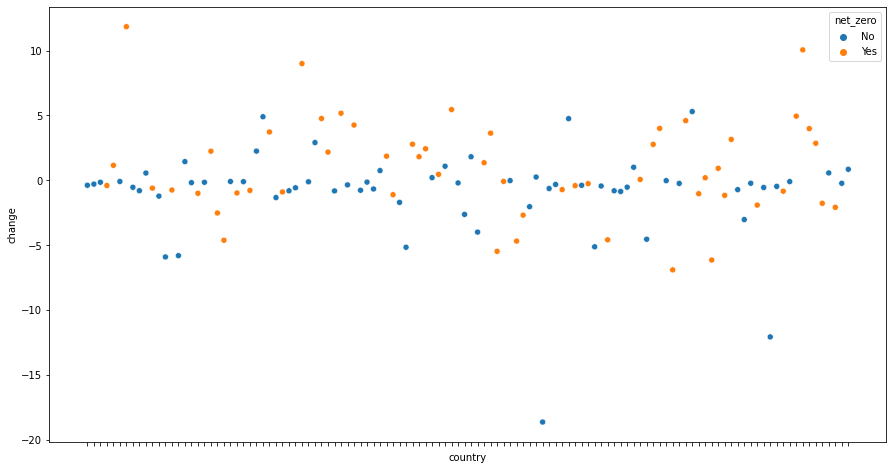

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.scatterplot(x='country', y='change', hue='net_zero', data=df5)
ax.set_xticklabels('')
plt.show()

In [ ]:
df5.loc[df5['net_zero'] == 'Yes'].describe()

,_1999,_2019,change
count,54.000000,54.000000,54.000000
mean,8.990653,8.110931,0.879722
std,7.656414,6.313052,3.778318
min,0.061146,0.196779,-6.897736
25%,2.011818,4.222914,-1.021227
50%,8.299554,6.761552,0.134953
75%,11.876569,10.211707,3.081456
max,30.968097,36.436425,11.843436


In [ ]:
df5.loc[df5['net_zero'] == 'No'].describe()

,_1999,_2019,change
count,64.000000,64.000000,64.000000
mean,4.320042,5.226370,-0.906328
std,5.524646,6.498377,3.402949
min,0.071890,0.094005,-18.623711
25%,0.486082,0.878775,-0.806170
50%,1.704986,2.452998,-0.331758
75%,6.166484,7.560201,-0.021003
max,22.545798,27.081242,5.301728


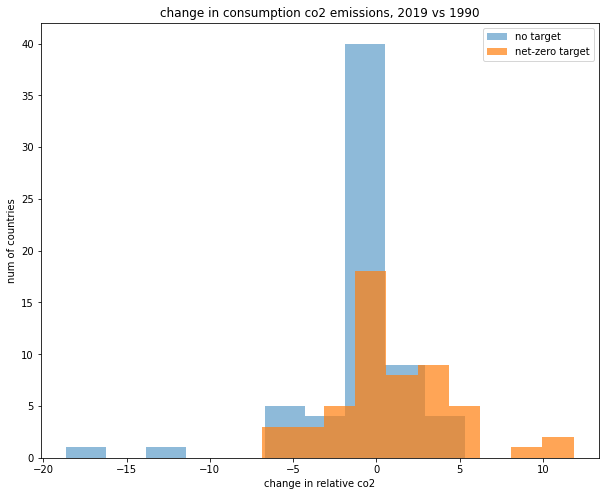

In [ ]:
x1 = df5.loc[df5['net_zero'] == 'Yes', 'change']
x2 = df5.loc[df5['net_zero'] == 'No', 'change']
fig, ax = plt.subplots(figsize=(10,8))
ax.hist(x2, alpha=0.5, label='no target')
ax.hist(x1, alpha=0.7, label='net-zero target')
ax.set(xlabel='change in relative co2', ylabel='num of countries', title='change in consumption co2 emissions, 2019 vs 1990')
ax.legend()
plt.show()

In [ ]:
x1 = df5.loc[df5['net_zero'] == 'Yes', 'change']
x2 = df5.loc[df5['net_zero'] == 'No', 'change']
display(np.std(x2)/np.std(x1))
display(np.var(x1), np.var(x2))

tstat, pval = ttest_ind(x1, x2)
pval

0.9019783191078192

14.011324818299796

11.399121908501225

0.00796141839738773

In [ ]:
# 1990-2019, net-zero target
df5.sort_values(by='change', ascending=False).iloc[:15]

,country,_1999,_2019,change,net_zero
6,Bahrain,23.392556,11.549120,11.843436,Yes
110,United Arab Emirates,30.706554,20.650168,10.056387,Yes
33,Estonia,20.256880,11.257882,8.998998,Yes
56,Kazakhstan,17.775886,12.322663,5.453223,Yes
93,Slovakia,13.731799,8.430071,5.301728,No
39,Germany,15.049855,9.875110,5.174745,Yes
109,Ukraine,9.825856,4.875773,4.950083,Yes
27,Czechia,14.586771,9.683968,4.902802,No
36,Finland,16.054938,11.290529,4.764409,Yes
74,Netherlands,13.410095,8.653269,4.756826,No


In [ ]:
# 2005-2019, net-zero target
df6 = df6.merge(zero_target, how='left', on=['country'])
df6.loc[df6['net_zero'] != 'Yes', 'net_zero'] = 'No'

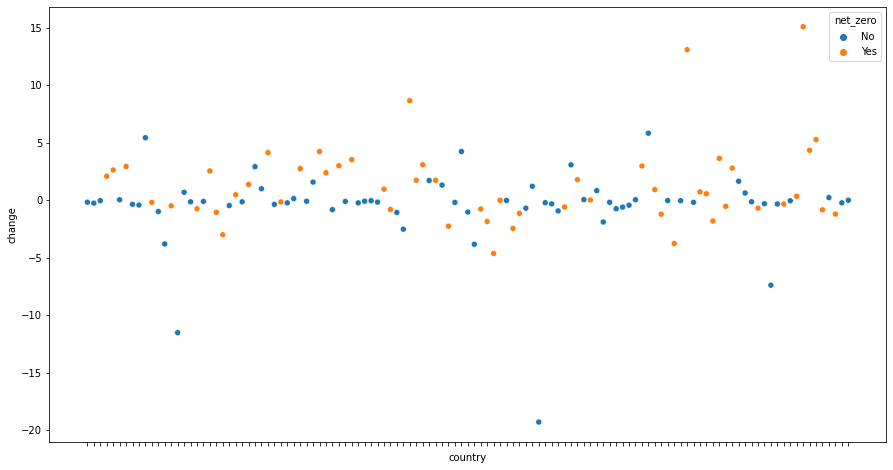

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.scatterplot(x='country', y='change', hue='net_zero', data=df6)
ax.set_xticklabels('')
plt.show()

In [ ]:
df6.loc[df6['net_zero'] == 'Yes'].describe()

,2005,2019,change
count,53.000000,53.000000,53.000000
mean,9.457985,8.155517,1.302467
std,7.939093,6.364876,3.540411
min,0.177164,0.196779,-4.639846
25%,3.572443,4.037596,-0.770244
50%,8.652894,6.764284,0.553492
75%,12.405885,10.231144,2.788715
max,35.739552,36.436425,15.089385


In [ ]:
df6.loc[df6['net_zero'] == 'No'].describe()

,2005,2019,change
count,66.000000,66.000000,66.000000
mean,4.789905,5.258680,-0.468775
std,6.364601,6.417168,3.295548
min,0.058143,0.094005,-19.301749
25%,0.687011,0.915068,-0.434268
50%,1.841183,2.548113,-0.157074
75%,6.274509,7.727916,0.045025
max,32.906946,27.081242,5.825704


In [ ]:
df6.sort_values(by='change', ascending=False).iloc[:15]

,country,2005,2019,change,net_zero
111,United Arab Emirates,35.739552,20.650168,15.089385,Yes
93,Singapore,32.195238,19.110173,13.085064,Yes
50,Ireland,17.098834,8.445472,8.653362,Yes
87,Qatar,32.906946,27.081242,5.825704,No
9,Belgium,20.293480,14.865513,5.427967,No
113,United States,22.360743,17.096274,5.264469,Yes
112,United Kingdom,12.052939,7.710570,4.342369,Yes
58,Kuwait,25.551538,21.318602,4.232936,No
36,Finland,15.517787,11.290529,4.227258,Yes
28,Denmark,12.405885,8.272006,4.133879,Yes


In [ ]:
# highest emissions per capita in 2019
df6.sort_values(by=2019, ascending=False).iloc[:15]

,country,2005,2019,change,net_zero
63,Luxembourg,31.796579,36.436425,-4.639846,Yes
87,Qatar,32.906946,27.081242,5.825704,No
14,Brunei,11.473192,23.002751,-11.529559,No
70,Mongolia,3.447158,22.748907,-19.301749,No
106,Trinidad and Tobago,14.284645,21.681485,-7.396840,No
58,Kuwait,25.551538,21.318602,4.232936,No
111,United Arab Emirates,35.739552,20.650168,15.089385,Yes
93,Singapore,32.195238,19.110173,13.085064,Yes
91,Saudi Arabia,15.053257,18.833461,-3.780204,Yes
113,United States,22.360743,17.096274,5.264469,Yes


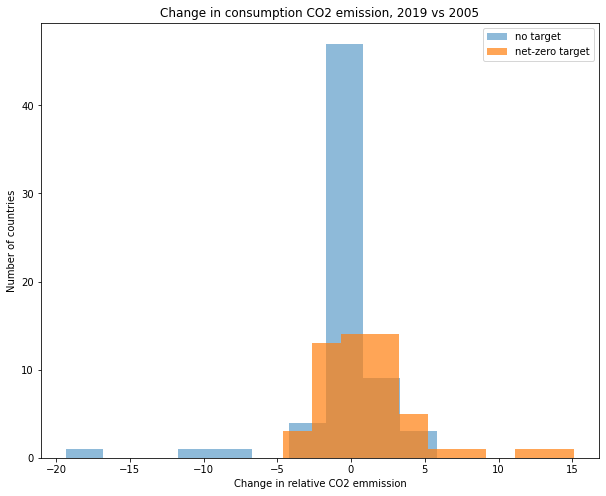

In [ ]:
x3 = df6.loc[df6['net_zero'] == 'Yes', 'change']
x4 = df6.loc[df6['net_zero'] == 'No', 'change']
fig, ax = plt.subplots(figsize=(10,8))
ax.hist(x4, alpha=0.5, label='no target')
ax.hist(x3, alpha=0.7, label='net-zero target')
ax.set(xlabel='Change in relative CO2 emmission', ylabel='Number of countries', title='Change in consumption CO2 emission, 2019 vs 2005')
ax.legend()
# plt.savefig('zero_target_2005')
plt.show()

In [ ]:
x3 = df6.loc[df6['net_zero'] == 'Yes', 'change']
x4 = df6.loc[df6['net_zero'] == 'No', 'change']
display(np.std(x4)/np.std(x3))
display(np.var(x3), np.var(x4))

tstat, pval = ttest_ind(x3, x4)
display(pval)

0.9325988746746239

12.298012097462108

10.696081171178413

0.005658177028959649